# Overlapping densities plots

Also known as "joyplots", "ridgeline plots", "stacked density plots", "overlapping density plots", etc.

### Some packages which support/provide this type of plot:
- [seaborn](https://seaborn.pydata.org/index.html) (python - based on matplotlib)
- [joypy](https://github.com/sbebo/joypy) (python - based on matplotlib)
- [ggridges](https://github.com/clauswilke/ggridges) (R - based on ggplot2)

**Note**: Both `seaborn` and `joypy` prefer the data to be in form of a `pandas` dataframe.

### Examples and recipes:
There are a hanful of examples/recipes on how to make these plots with these packages:
- [Making ridgeline plots with seaborn](https://seaborn.pydata.org/examples/kde_ridgeplot.html)
- [Making ridgeline plots with joypy](https://github.com/sbebo/joypy/blob/master/Joyplot.ipynb)
- [Making ridgeline plots with ggridges](https://www.data-to-viz.com/graph/ridgeline.html)

Personally, I found the Joypy package flexible and easy to use, while the seaborn implementation seems significantly less flexible.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joypy
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

In [2]:
dist1 = pd.DataFrame(np.random.normal(size=5000),columns=['Draws'])
dist1['Name'] = 'Gaussian'

dist2 = pd.DataFrame(np.random.beta(1,2,size=5000),columns=['Draws'])
dist2['Name'] = 'Beta'

dist3 = pd.DataFrame(np.random.gamma(1,size=5000),columns=['Draws'])
dist3['Name'] = 'Gamma'

dist4 = pd.DataFrame(np.random.exponential(size=5000),columns=['Draws'])
dist4['Name'] = 'Exponential'


full_df1 = pd.concat([dist1,dist2,dist3,dist4])
full_df1.head()

,Draws,Name
0,-0.333048,Gaussian
1,-2.173259,Gaussian
2,0.586241,Gaussian
3,0.461146,Gaussian
4,-0.834203,Gaussian


Text(0.5, 54.51642770141579, 'X')

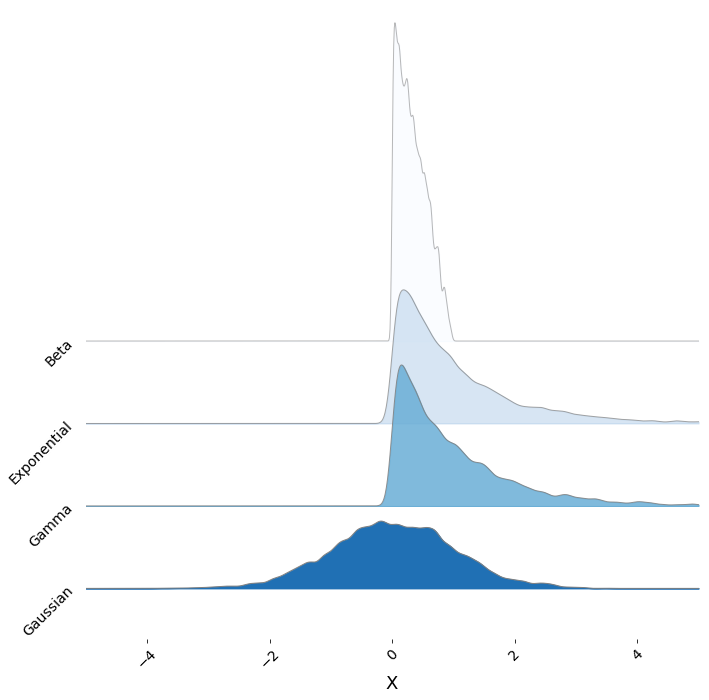

In [3]:
fig, axes = joypy.joyplot(full_df1, column='Draws', by='Name', grid=False, 
                          xlabelsize=14, xrot=45, ylabelsize=14, yrot=45, 
                          ax=None, figsize=(10,10), 
                          hist=False, bins=10, 
                          fade=True, ylim='max', fill=True, 
                          linecolor='0.5',linewidth=1.0, overlap=7, background=None, labels=None, 
                          xlabels=True, ylabels=True, range_style='all', x_range=(-5,5), 
                          title=None, colormap=cm.Blues, bw_method=0.08)

axes[-1].set_xlabel('X',fontsize=18)
#plt.savefig('plot.pdf')

## Pitfalls:

- Note that these plots typically use KDEs, thus caution is needed in choosing KDE bandwidth. Joypy allows you to pass bandwidth arguments to its kde estimator (`scipy.stats.gaussian_kde`).

- Order: Sorting these plots in a custom order is a bit of a hassle. One way I managed to force it in Joypy was to introduce a new column in the data frame that had values mapped to the column "Names" based on the order I wanted.